<a href="https://colab.research.google.com/github/dennismugane/projo/blob/master/Analysis_to_test_for_hypothyroidism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Supervised Learning with Decision Trees and SVM
1. **Defining the Question**

a) **Specifying the Question**

To study the factors that cause hypothyroidism & build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

b) **Defining the Metric for Success**

Determine whether or not the patient's symptoms indicate that the patient has hypothyroid.

Use my model to determine which features are most impactful in influencing the prediction for the models created. The aim of the model is:



> 

*   Achieve an Accuracy above 85%
*   F1 score above 85%

C)Understanding the problem context.

The thyroid gland is a small organ that’s located in the front of the neck, wrapped around the windpipe (trachea). It’s shaped like a butterfly, smaller in the middle with two wide wings that extend around the side of your throat. The thyroid is a gland. You have glands throughout your body, where they create and release substances that help your body do a specific thing. Your thyroid makes hormones that help control many vital functions of your body.

When your thyroid doesn’t work properly, it can impact your entire body. If your body makes too much thyroid hormone, you can develop a condition called hyperthyroidism. If your body makes too little thyroid hormone, it’s called hypothyroidism. Both conditions are serious and need to be treated by your healthcare provider.

Terms used in the dataset have the following meaning:



*   Thyroid Stimulating Hormone(TSH) - rises whenever the thyroid gland fails to produce sufficient thyroid hormone. When there is too much thyroid hormone present in the serum, the brain responds by lowering the TSH. It is High in hyperthyroidism and Low in hypothyroidism.
*  Thyroid binding globulin(TBG) - plasma proteins. 



*   Triiodothyronine (T3) - High in and Low in hypothyroidism.
*Total thyroxine (TT4) - High in hyperthyroidism and Low in hypothyroidism. It is usually slightly High during pregnancy because of increased levels of TBG.














2. Importing Libraries

In [33]:
#importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.pylabtools import figsize

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.feature_extraction import DictVectorizer

import xgboost as xgb

from sklearn.model_selection import cross_val_score

from sklearn_pandas import DataFrameMapper, CategoricalImputer

from sklearn.pipeline import FeatureUnion

from sklearn.preprocessing import FunctionTransformer

from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC

from sklearn import metrics

from sklearn.metrics import accuracy_score

from sklearn.tree import export_graphviz

from six import StringIO  

from IPython.display import Image  

import pydotplus

from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

3. Loading the Datasets

In [34]:
#previewing the dataset
data = pd.read_csv('/content/hypothyroid.csv')
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [35]:
#previewing the tail of the data
data.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [36]:
#getting the info of the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

Data Cleaning 

In [37]:
#getting the general overview of the data
data.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


In [38]:
#checking for misssing values
data.isnull().sum()

#There are no null values in our dataset
#However we have '?' which are not considered as null values but they are in our dataset
#we need to replace '?' with zeros

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [39]:
#replacing the '?' with zero
data = data.replace(['?'], np.nan)
data.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [40]:
#checking the dtype of the dataset
data.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [41]:
#changing our data type by converting to numerical arrays
data_2 = data

categorical_columns = ['sex', 'on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
                       'thyroid_surgery','query_hypothyroid','query_hyperthyroid', 'pregnant',
                       'sick','tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured', 
                       'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']
Numerical_coloumns = ['age','TSH','T3', 'TT4', 'T4U', 'FTI' , 'TBG']

#using for loop
for columns in data_2.columns:
  if columns in Numerical_coloumns:
    data_2[columns] = pd.to_numeric(data_2[columns])
  else:
    data_2[columns] = data_2[columns].astype('category')

data_2.dtypes


status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

In [42]:
#working on the missing values in the age column by replacing with mean 
data_2['age'] = data_2['age'].fillna(data_2['age'].mean(), axis = 0)

In [43]:
#replacing the missing values in sex column with modal
data_2['sex'] = data_2['sex'].fillna(data_2['sex'].mode(), axis=0)

In [44]:
#replacing the null values in the numerical columns with zero

Numerical_coloumns_2 = ['TSH','T3','TT4','T4U','FTI','TBG']

data_2[Numerical_coloumns_2] = data_2[Numerical_coloumns_2].fillna(0)

In [45]:
#checking number of duplicated rows
data_2.duplicated().sum()

77

In [46]:
#dropping the duplicates 
data_2 = data_2.drop_duplicates()

In [47]:
#confirming dropped duplicates
data_2.duplicated().sum()

0

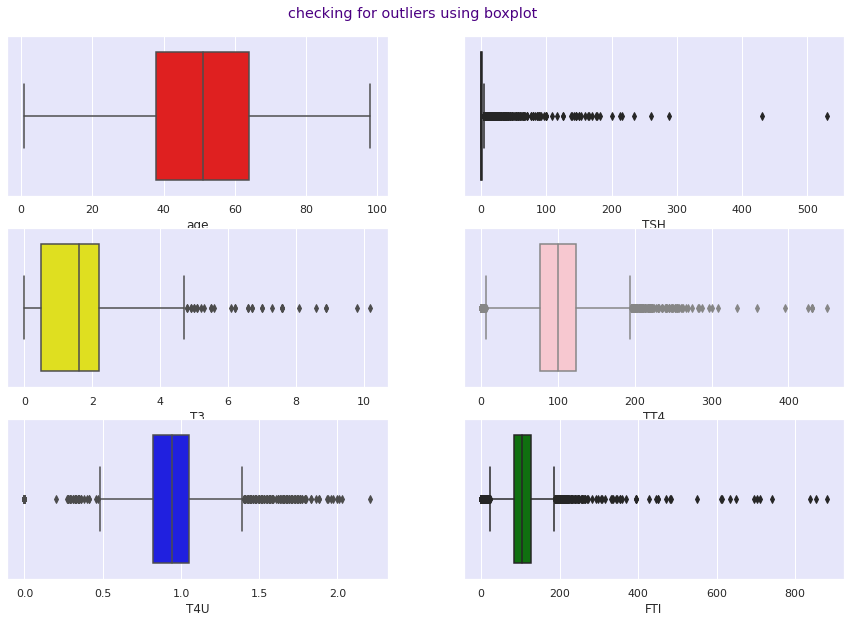

In [48]:
#checking for outliers using boxplot
import seaborn as sns

#creating a list of columns to check for outliers 
#create a list of colors
cols = ['age','TSH','T3','TT4','T4U','FTI','TBG']
colors = ['red', 'purple','yellow','pink','blue','green','orange']

fig, axes = plt.subplots(nrows=3,ncols=2,figsize = (15,10))
plt.suptitle('checking for outliers using boxplot', y = 0.92, color = 'indigo')
for ax, data, columns, color in zip(axes.flatten(),data_2,cols,colors):
  sns.boxplot(data_2[columns],ax =ax, color=color)
  ax.set_facecolor('lavender')


**6. Exploratory Analysis**

Univariate Analysis

In [49]:
data_2['TBG'].nunique()

52

In [50]:
#dropping the 'TBG' column

data_2 = data_2.drop(['TBG'], axis=1)

In [51]:
#count plot of categorical data in our dataset

categorical_columns_1 =[ 'sex', 'on_thyroxine', 'query_on_thyroxine',
                         'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
                         'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
                         'TSH_measured', 'T3_measured', 'TT4_measured',
                         'T4U_measured', 'FTI_measured', 'TBG_measured']

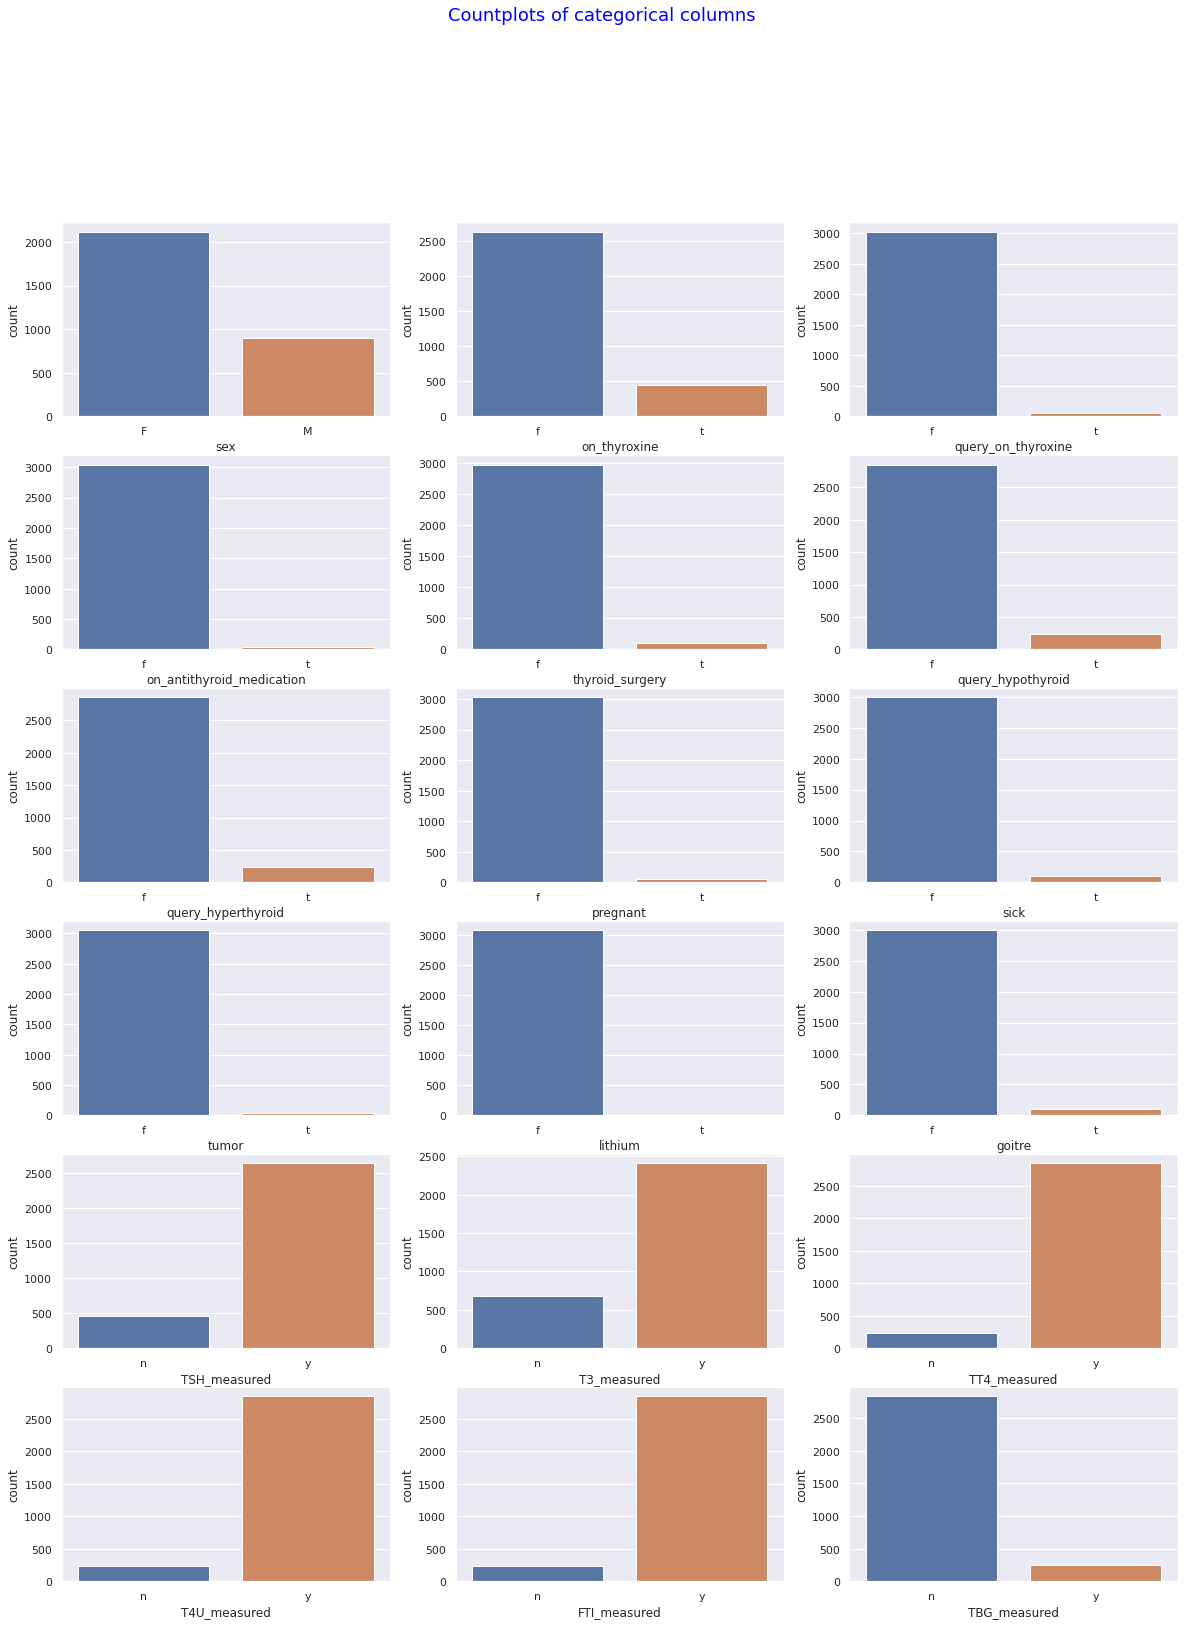

In [52]:
categorical_columns_1 =[ 'sex', 'on_thyroxine', 'query_on_thyroxine',
      'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
      'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
      'TSH_measured', 'T3_measured', 'TT4_measured',
      'T4U_measured', 'FTI_measured', 'TBG_measured']


sns.set(style = 'darkgrid', context = 'notebook')
corr = data_2.corr()
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20,25))
plt.suptitle('Countplots of categorical columns', fontsize = 18, y = 1, color = 'blue')
for ax, data, column in zip(axes.flatten(), data_2, categorical_columns_1):
   sns.countplot(data_2[column], ax=ax)

Bivariate Analysis

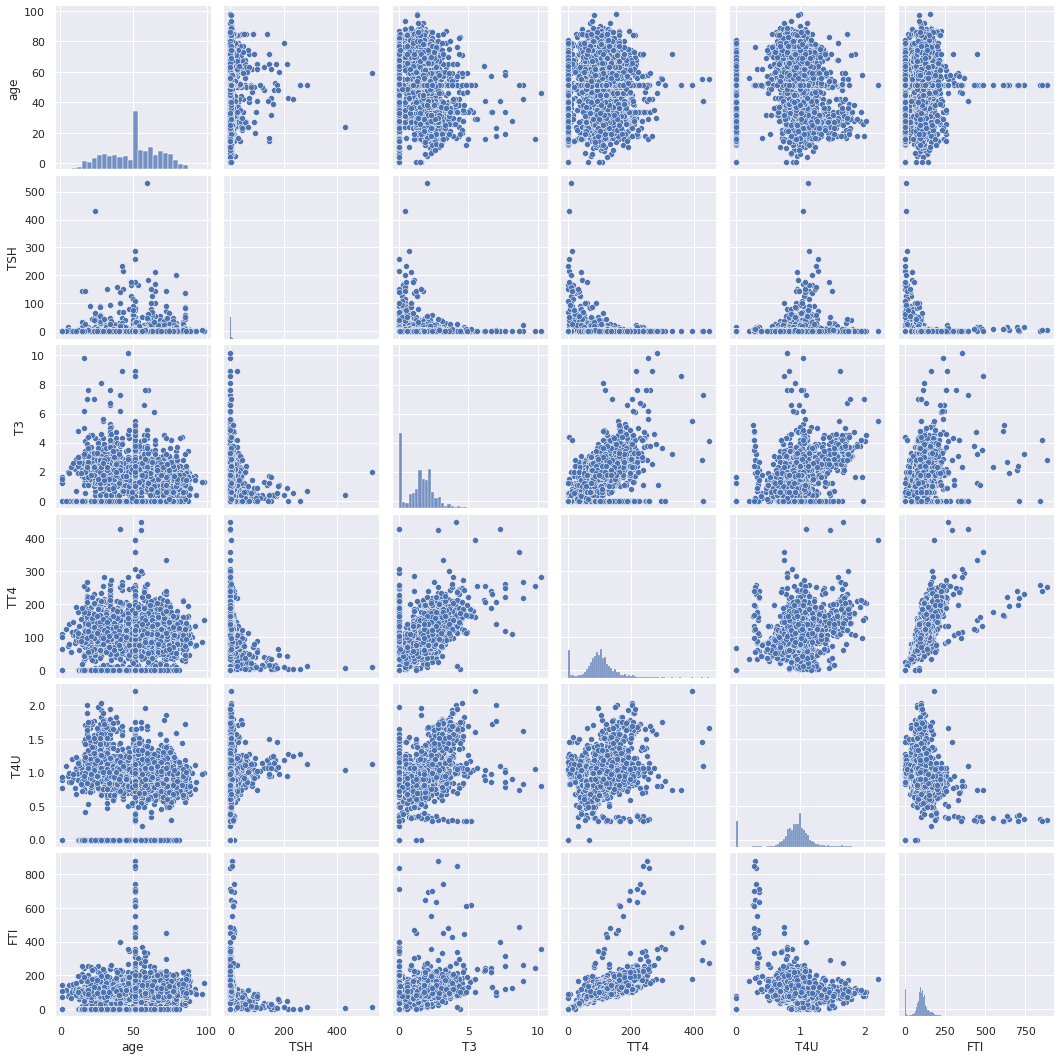

In [53]:
#we use pairplot to check the correlation between variables
sns.pairplot(data_2, kind = 'scatter', dropna= False)
plt.show()

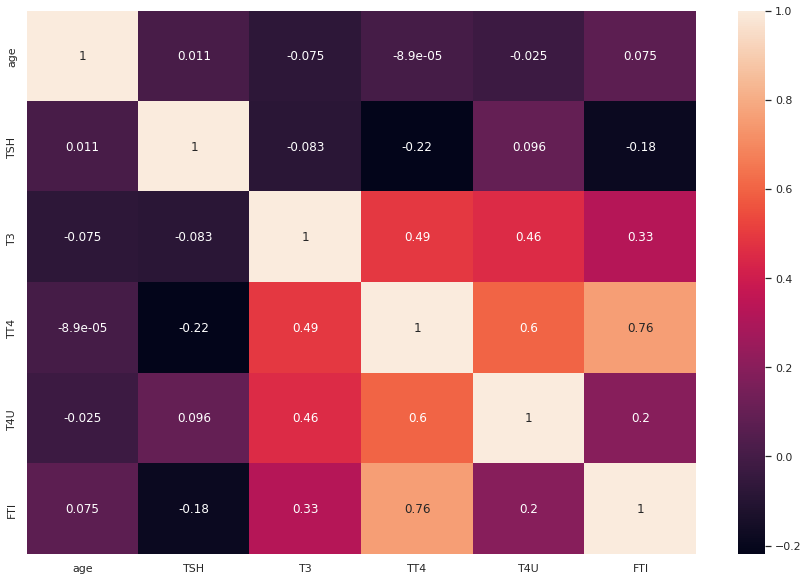

In [54]:

#checking the extent of correlation using heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)
plt.show()
#the parts with light shaded region shows high correlation 
#while parts with purple region shows little correlation or no correlation.

Check for multicollinearity

In [55]:
#display the correlation btn the variables
corr = data_2.corr()
corr

,age,TSH,T3,TT4,T4U,FTI
age,1.000000,0.011431,-0.074543,-0.000089,-0.024815,0.074604
TSH,0.011431,1.000000,-0.083445,-0.219696,0.096258,-0.183648
T3,-0.074543,-0.083445,1.000000,0.493887,0.455964,0.326356
TT4,-0.000089,-0.219696,0.493887,1.000000,0.600486,0.758395
T4U,-0.024815,0.096258,0.455964,0.600486,1.000000,0.196093
FTI,0.074604,-0.183648,0.326356,0.758395,0.196093,1.000000


Modelling using Logistic Regression as a baseline model

In [56]:
#we create a baseline model i.e LogisticRegression
#import the necessary libraries
from sklearn.linear_model import LogisticRegression 
X = data_2.drop('status', axis=1)
X = pd.get_dummies(X)

#X Wwill be our training model with features
y = data_2.status.cat.codes

#split my data into independent and dependent variable
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [57]:
print('accuracy :',accuracy_score(y_test,y_pred))
print('F1_score :',f1_score(y_test,y_pred))
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix
#we have 98% accuracy from this baseline model


accuracy : 0.988673139158576
F1_score : 0.9941225860621328


array([[ 19,   6],
       [  1, 592]])

**Decision Trees**

Random Forest

In [60]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=0, test_size= 0.2)

forest = RandomForestClassifier(n_estimators = 100, max_depth=5, min_samples_split=10, random_state=42)
forest.fit(X_train,y_train)
y_pred = forest.predict(X_test)

#PREDICTION BASED ON THE MODEL
comparison_frame = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
comparison_frame



,Actual,Predicted
1188,1,1
1205,1,1
713,1,1
2791,1,1
1318,1,1
...,...,...
1305,1,1
2479,1,1
1069,1,1
806,1,1


In [63]:
from sklearn.metrics import r2_score
print('accuracy :', accuracy_score(y_test,y_pred))
print('f1_score :', f1_score(y_test,y_pred))
print('R^2 :',r2_score(y_test,y_pred))
print("R2 score : %.2f" % r2_score(y_test,y_pred))

accuracy : 0.9870550161812298
f1_score : 0.993288590604027
R^2 : 0.6665092748735244
R2 score : 0.67


In [66]:
from sklearn.tree import DecisionTreeClassifier

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=0)
tree = DecisionTreeClassifier(max_depth =5,min_samples_split=10)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

print('accuracy :',accuracy_score(y_test,y_pred))
print('f1_score :',f1_score(y_test,y_pred))


accuracy : 0.9902912621359223
f1_score : 0.9949324324324325


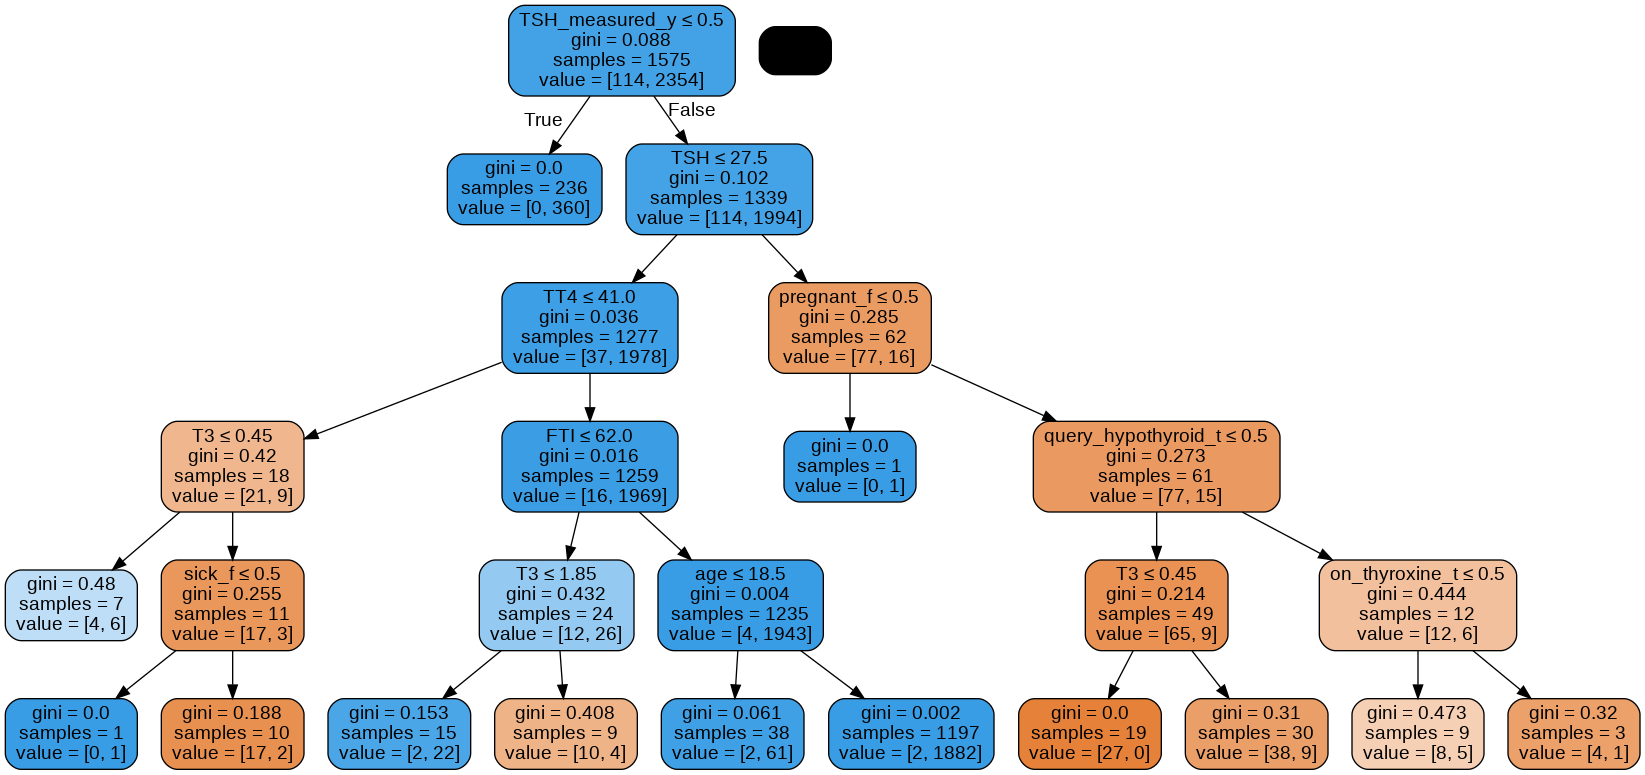

In [70]:
#visualizing the tree
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

y_pred = forest.predict(X_test)
dot_data = StringIO()

# picking a specific tree from the forest; 

tree = forest.estimators_[25]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypothyroid_Test.png')
Image(graph.create_png())

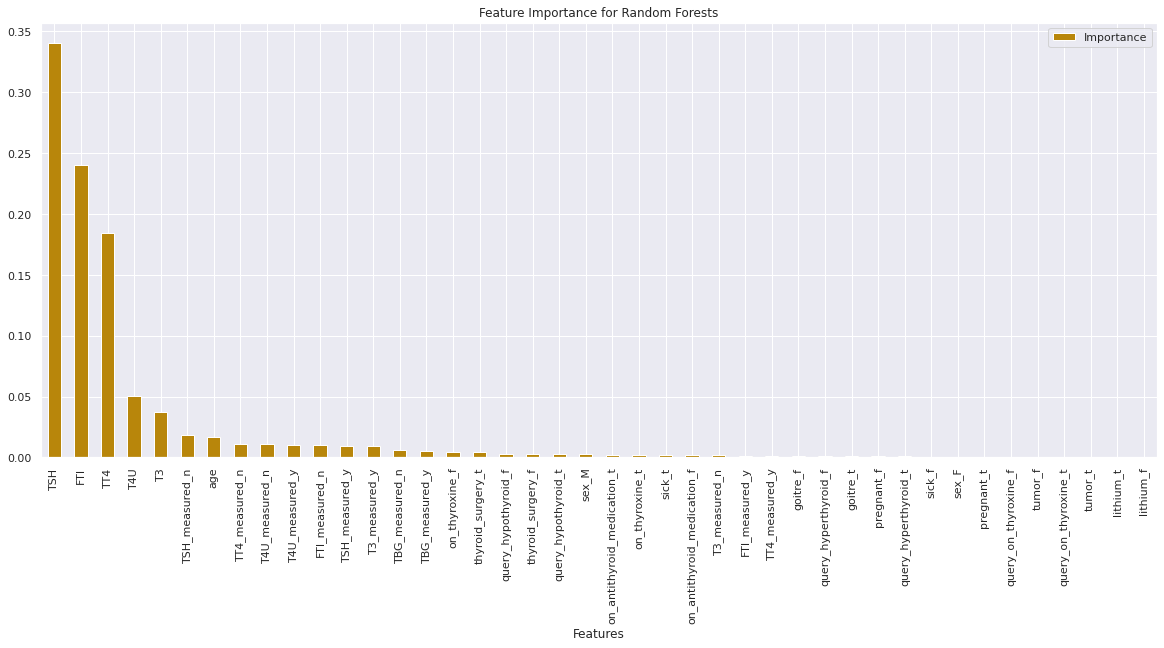

In [71]:
# Getting the feature importance

pd.DataFrame({'Features' : X.columns, 'Importance' : forest.feature_importances_})\
.sort_values(by = 'Importance', ascending = False).set_index('Features')\
.plot.bar(title = 'Feature Importance for Random Forests',figsize = (20, 8), color = 'darkgoldenrod')
plt.show()

In [72]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

params = {'n_estimators' : [250, 300, 450, 500, 600]}

ada_boost = AdaBoostClassifier()

search = GridSearchCV(ada_boost, scoring = 'accuracy', param_grid = params, cv = 10)

search.fit(X, y)

search.best_params_

{'n_estimators': 250}

In [74]:
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=250, random_state=5)

ada_boost = ada_boost.fit(X_train, y_train)

y_pred_ada = ada_boost.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_ada))

print('F1_score:',f1_score(y_test, y_pred))
# The accuracy score is 99.5 which is a very high score

Accuracy score: 0.9935275080906149
F1_score: 0.993288590604027


Gradient Boosted Trees 

In [75]:
# Importing the relevant libraries

from sklearn.ensemble import GradientBoostingClassifier

target_number_of_trees = 250

gbc = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.001, max_depth=20)
gbc = gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred_ada))
print("R2 score : %.2f" % r2_score(y_test,y_pred_gbc))
print('F1_score:',f1_score(y_test, y_pred))

Accuracy score: 0.9935275080906149
R2 score : -0.04
F1_score: 0.993288590604027
